Vertex Coloring:
Vertex 0: Color 0
Vertex 1: Color 1
Vertex 2: Color 2
Vertex 3: Color 0
Vertex 4: Color 2
Vertex 5: Color 1
Vertex 6: Color 1
Vertex 7: Color 0
Vertex 8: Color 0
Vertex 9: Color 2


/var/folders/ns/s4s78hns3jq5qk64vq8c8z5c0000gn/T/ipykernel_17332/2197294372.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab20'),


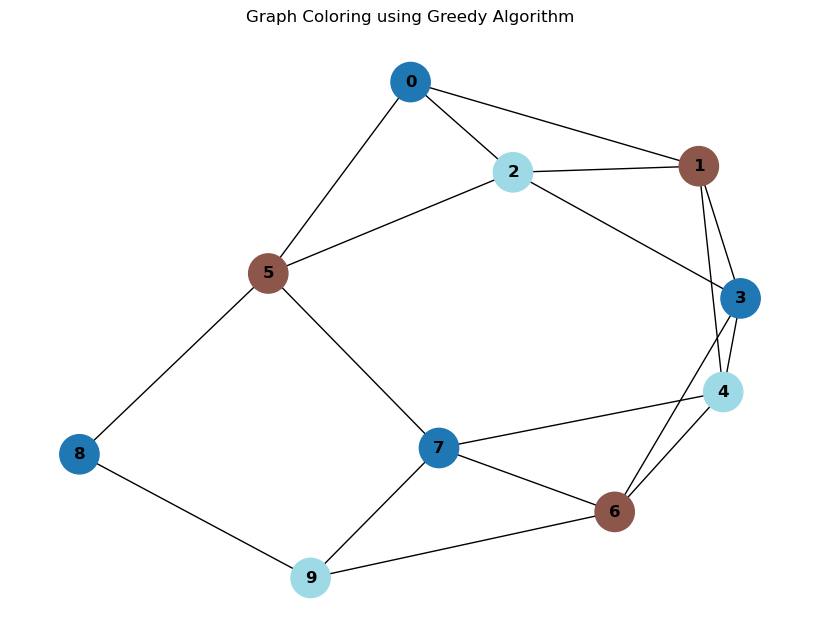

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def greedy_coloring(graph):
    coloring = {}
    
    for vertex in graph:
        #find color of neighbors vertices
        adjacent_colors = {coloring[neighbor] for neighbor in graph[vertex] if neighbor in coloring}
        
        #the smallest available color
        color = 0
        while color in adjacent_colors:
            color += 1
        coloring[vertex] = color
    return coloring

def plot_colored_graph(graph, coloring):
    G = nx.Graph()
    
    #Add nodes and edges
    for vertex, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)
    
    #color mapping
    colors = [coloring[node] for node in G.nodes]
    
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        with_labels=True,
        node_color=colors,
        node_size=800,
        cmap=plt.cm.get_cmap('tab20'),
        font_weight='bold'
    )
    plt.title("Graph Coloring using Greedy Algorithm")
    plt.show()

graph = {
    0: [1, 2, 5],
    1: [0, 2, 3, 4],
    2: [0, 1, 3, 5],
    3: [1, 2, 4, 6],
    4: [1, 3, 6, 7],
    5: [0, 2, 7, 8],
    6: [3, 4, 7, 9],
    7: [4, 5, 6, 9],
    8: [5, 9],
    9: [6, 7, 8]
}
coloring_result = greedy_coloring(graph)

print("Vertex Coloring:")
for vertex, color in coloring_result.items():
    print(f"Vertex {vertex}: Color {color}")

plot_colored_graph(graph, coloring_result)
